# Solar Flare Dataset
The solar flare dataset, available at the UCI Machine Learning Repository, offers valuable insights into the characteristics and classifications of solar flares. Solar flares are sudden bursts of energy released from the Sun's surface, and their study is crucial for understanding solar activity and its impact on our planet. This dataset comprises features extracted from different types of flares, such as their duration, peak flux, and location on the Sun's surface. It serves as a comprehensive resource for researchers and data scientists interested in solar physics, space weather forecasting, and related fields. By exploring this dataset, we can gain a deeper understanding of the complex nature of solar flares and uncover patterns that can help improve our knowledge of these powerful astronomical phenomena.

In [49]:
import matplotlib
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, balanced_accuracy_score, recall_score, \
    precision_score
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Define the file on which we're operating and the names of the columns because they're not provided

In [50]:
dataset1 = "flare.data1"
dataset2 = "flare.data2"

headers = ["Class", "Largest Spot", "Spot Distribution", "Activity", "Evolution", "Previous Activity", "Complex",
           "Complex On Path", "Area", "Largest Spot Area", "C-Class", "M-Class", "X-Class"]

# importing dataset
df = pd.read_csv(dataset1, sep=" ", header=None, skiprows=1, names=headers)
df2 = pd.read_csv(dataset2, sep=" ", header=None, skiprows=1, names=headers)
df = pd.merge(df, df2, how="outer")

## Data Exploration

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3247 entries, 0 to 3246
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Class              3247 non-null   object
 1   Largest Spot       3247 non-null   object
 2   Spot Distribution  3247 non-null   object
 3   Activity           3247 non-null   int64 
 4   Evolution          3247 non-null   int64 
 5   Previous Activity  3247 non-null   int64 
 6   Complex            3247 non-null   int64 
 7   Complex On Path    3247 non-null   int64 
 8   Area               3247 non-null   int64 
 9   Largest Spot Area  3247 non-null   int64 
 10  C-Class            3247 non-null   int64 
 11  M-Class            3247 non-null   int64 
 12  X-Class            3247 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 355.1+ KB


In [52]:
df.describe()

,Activity,Evolution,Previous Activity,Complex,Complex On Path,Area,Largest Spot Area,C-Class,M-Class,X-Class
count,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000
mean,1.063443,2.672929,1.038497,1.167539,1.954111,1.011087,1.075146,0.110872,0.028950,0.004004
std,0.243796,0.526164,0.267452,0.373514,0.209276,0.104726,0.263668,0.512952,0.233697,0.067860
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,8.000000,5.000000,2.000000


array([[<Axes: title={'center': 'Activity'}>,
        <Axes: title={'center': 'Evolution'}>,
        <Axes: title={'center': 'Previous Activity'}>],
       [<Axes: title={'center': 'Complex'}>,
        <Axes: title={'center': 'Complex On Path'}>,
        <Axes: title={'center': 'Area'}>],
       [<Axes: title={'center': 'Largest Spot Area'}>,
        <Axes: title={'center': 'C-Class'}>,
        <Axes: title={'center': 'M-Class'}>],
       [<Axes: title={'center': 'X-Class'}>, <Axes: >, <Axes: >]],
      dtype=object)

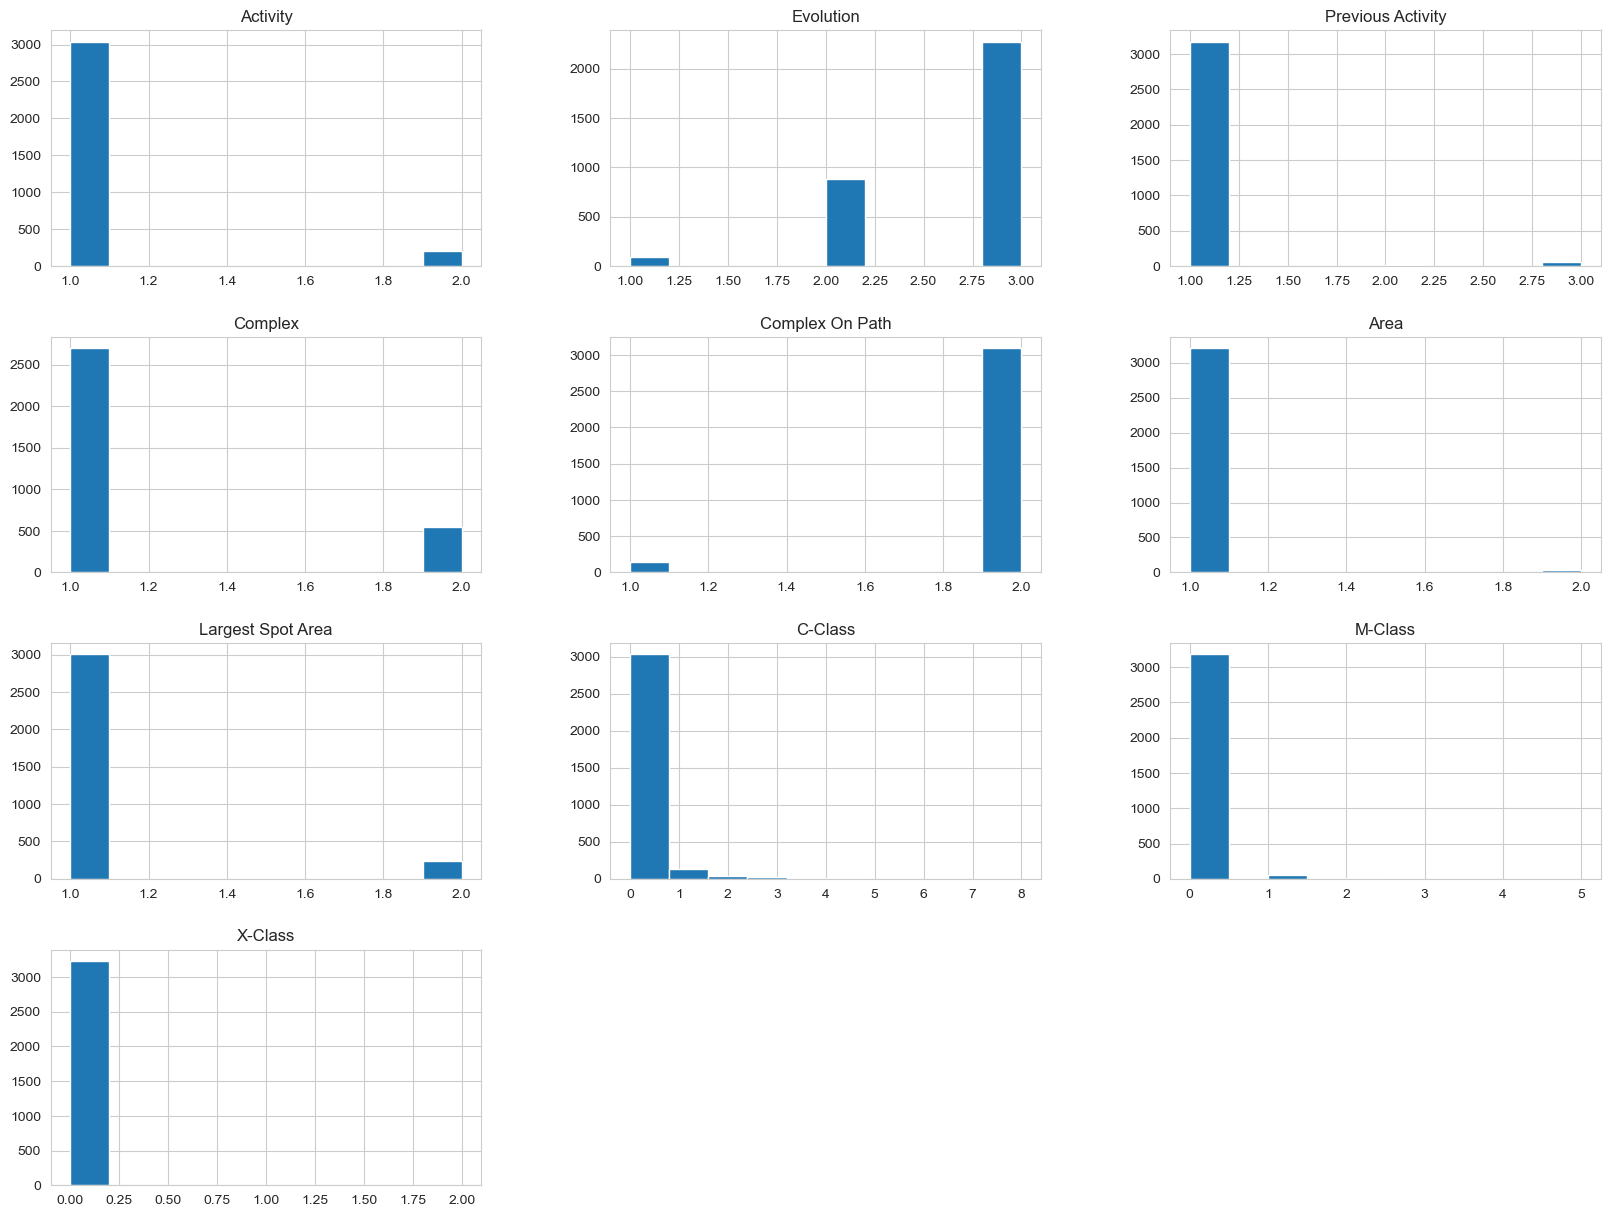

In [53]:
df.hist(figsize=(20, 15))

## Data Preprocessing
- Check for missing values (there shouldn't be any)
- Transform categorical data into numerical data

### Check for missing values

In [54]:
df.isnull().any()

Class                False
Largest Spot         False
Spot Distribution    False
Activity             False
Evolution            False
Previous Activity    False
Complex              False
Complex On Path      False
Area                 False
Largest Spot Area    False
C-Class              False
M-Class              False
X-Class              False
dtype: bool

In [55]:
df["Class"].unique()

array(['C', 'D', 'B', 'F', 'H', 'E'], dtype=object)

In [56]:
df["Largest Spot"].unique()

array(['S', 'A', 'K', 'R', 'X', 'H'], dtype=object)

In [57]:
df["Spot Distribution"].unique()

array(['O', 'I', 'X', 'C'], dtype=object)

### Transform categorical data into numerical data
Since the models we're going to use require numerical data, we need to transform the categorical data into numerical data. We're going to use the OrdinalEncoder from sklearn to do this.

In [58]:
encoder = OrdinalEncoder()
for col in ["Class", "Largest Spot", "Spot Distribution"]:
    df[col] = encoder.fit_transform(df[col].values.reshape(-1, 1))
    df[col] = df[col].astype("int")
df

,Class,Largest Spot,Spot Distribution,Activity,Evolution,Previous Activity,Complex,Complex On Path,Area,Largest Spot Area,C-Class,M-Class,X-Class
0,1,4,2,1,2,1,1,2,1,2,0,0,0
1,1,4,2,1,2,1,1,2,1,2,0,0,0
2,1,4,2,1,2,1,1,2,1,2,0,0,0
3,1,4,2,1,2,1,1,2,1,2,0,0,0
4,1,4,2,1,2,1,1,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242,2,1,2,1,2,1,2,2,1,1,0,0,0
3243,2,0,1,2,3,2,1,2,1,1,0,0,0
3244,3,0,2,1,2,1,2,2,1,1,4,1,0
3245,5,4,3,1,3,1,1,1,1,1,1,0,0


## Exploratory Data Analysis
### Boxplot

<Axes: >

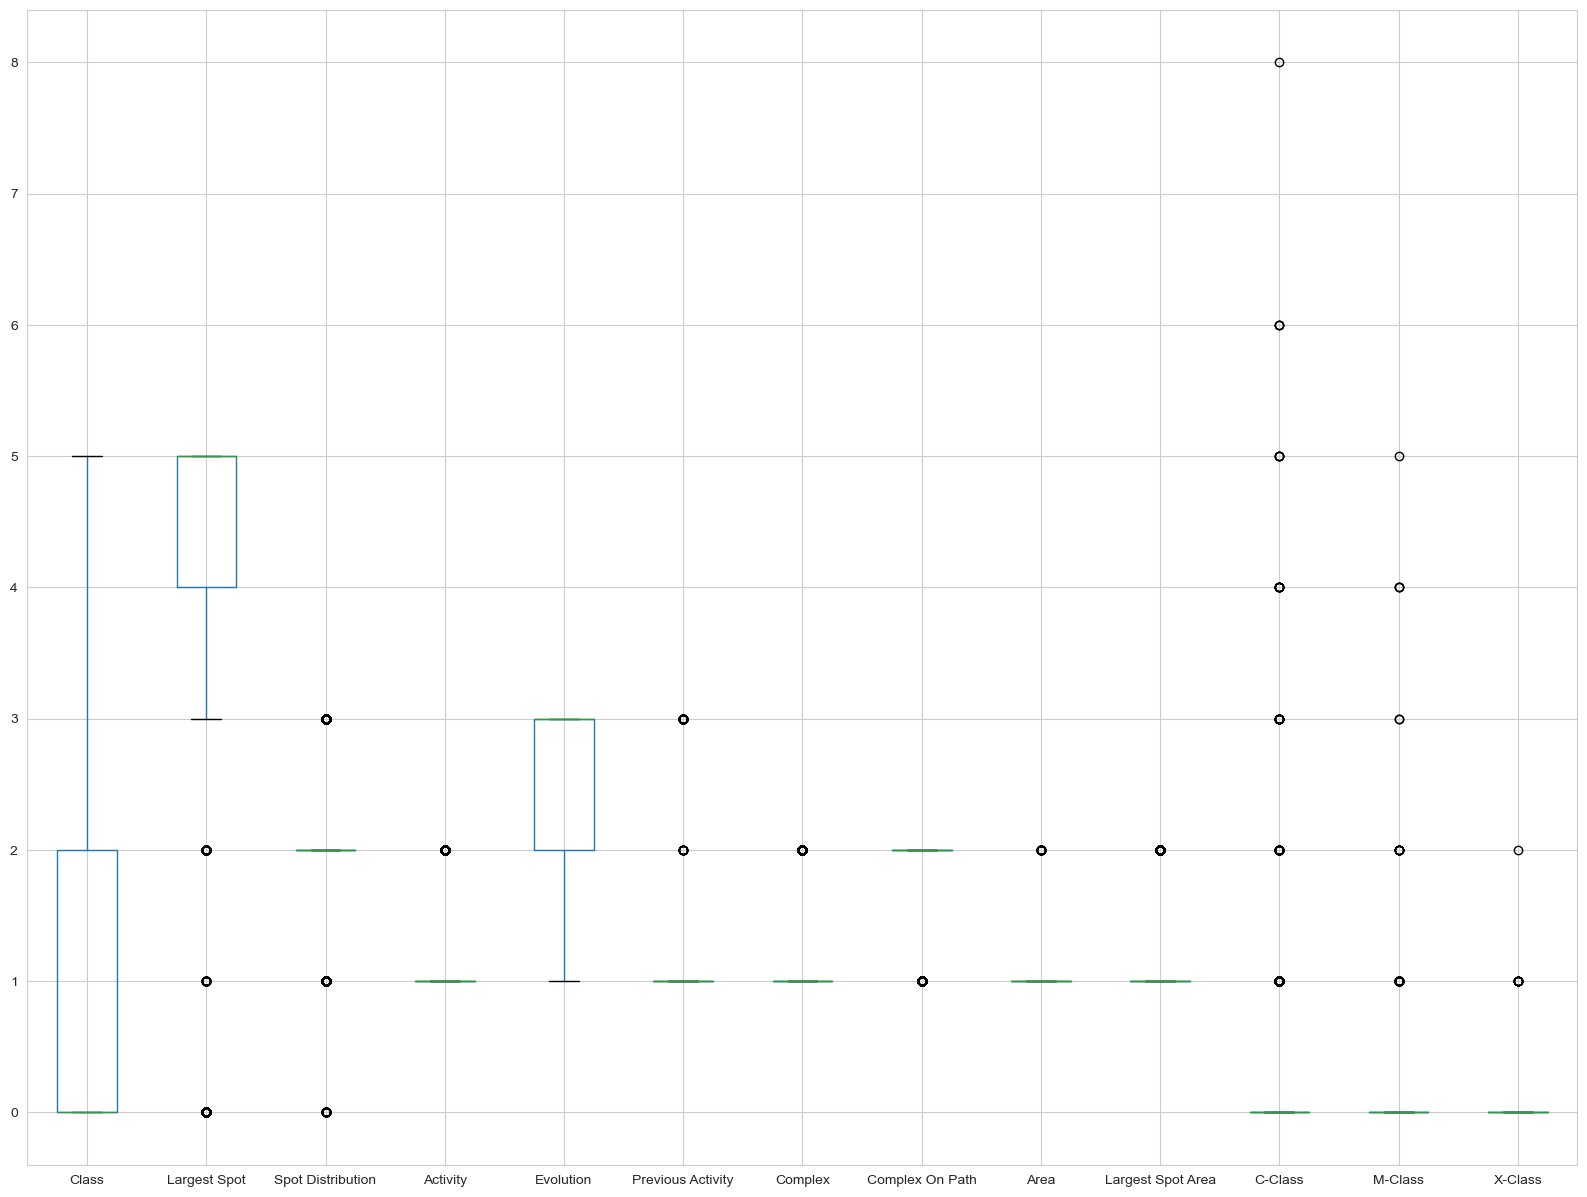

In [59]:
df.boxplot(figsize=(20, 15))

### Correlation Matrix

<Axes: >

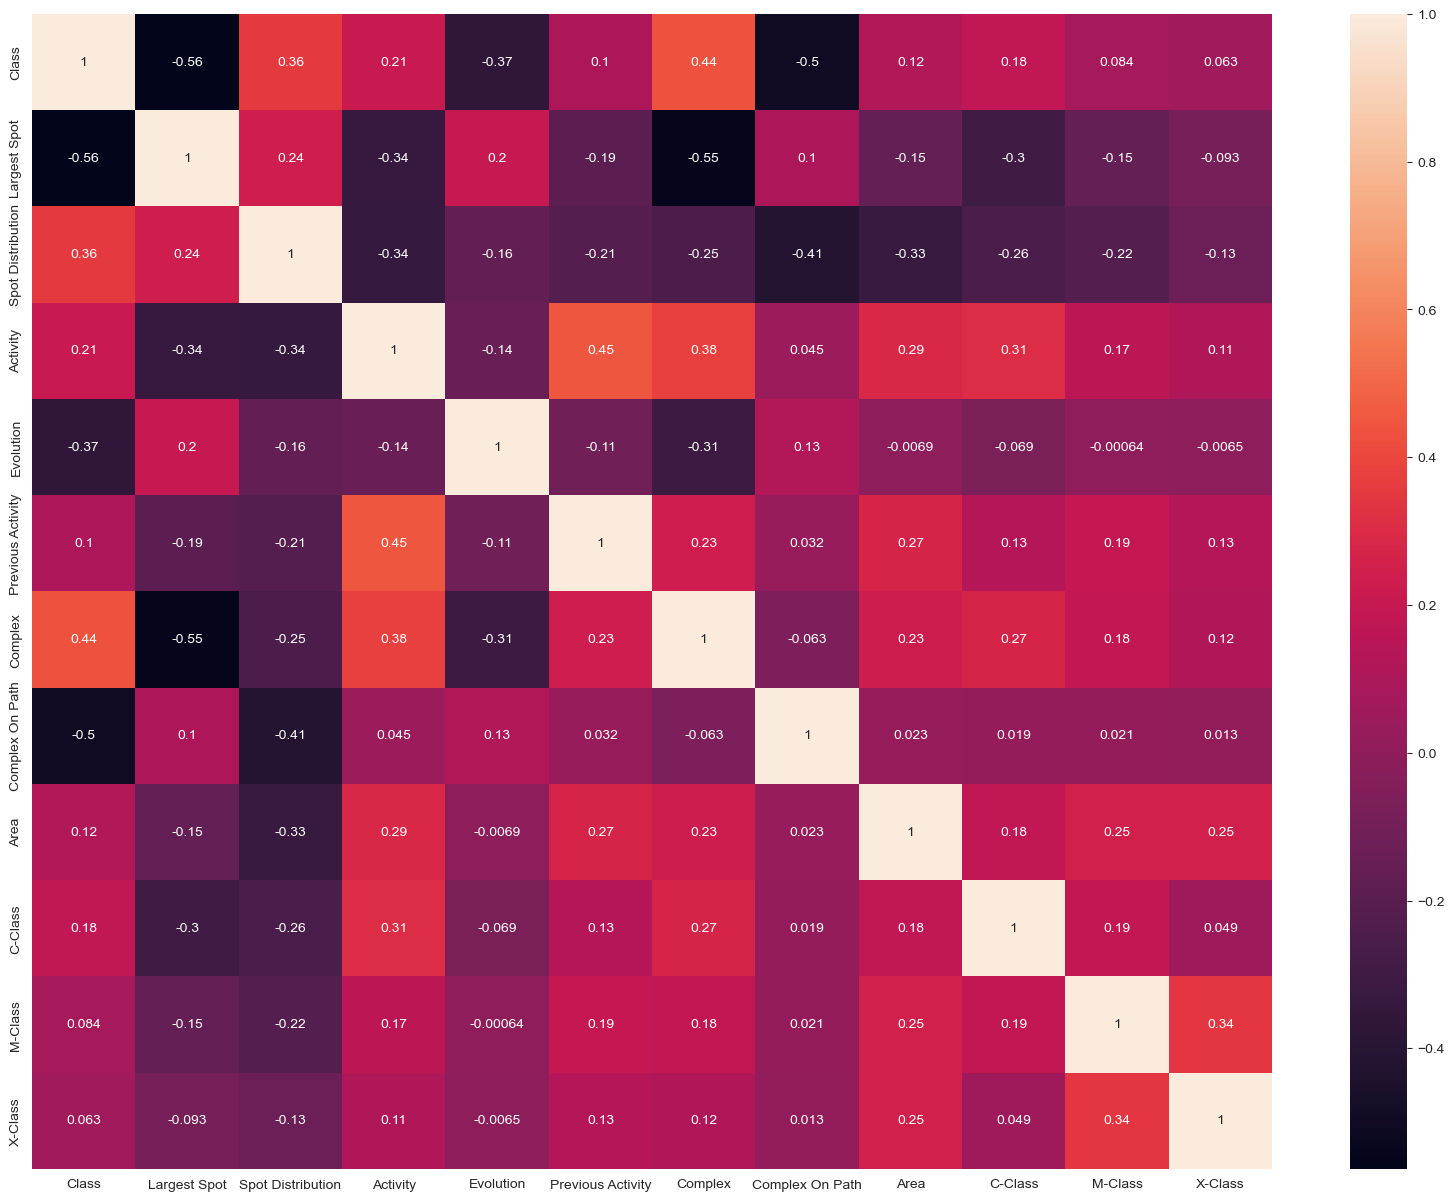

In [60]:
corr = df.drop(columns=["Largest Spot Area"]).corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)

## PCA and K-Means

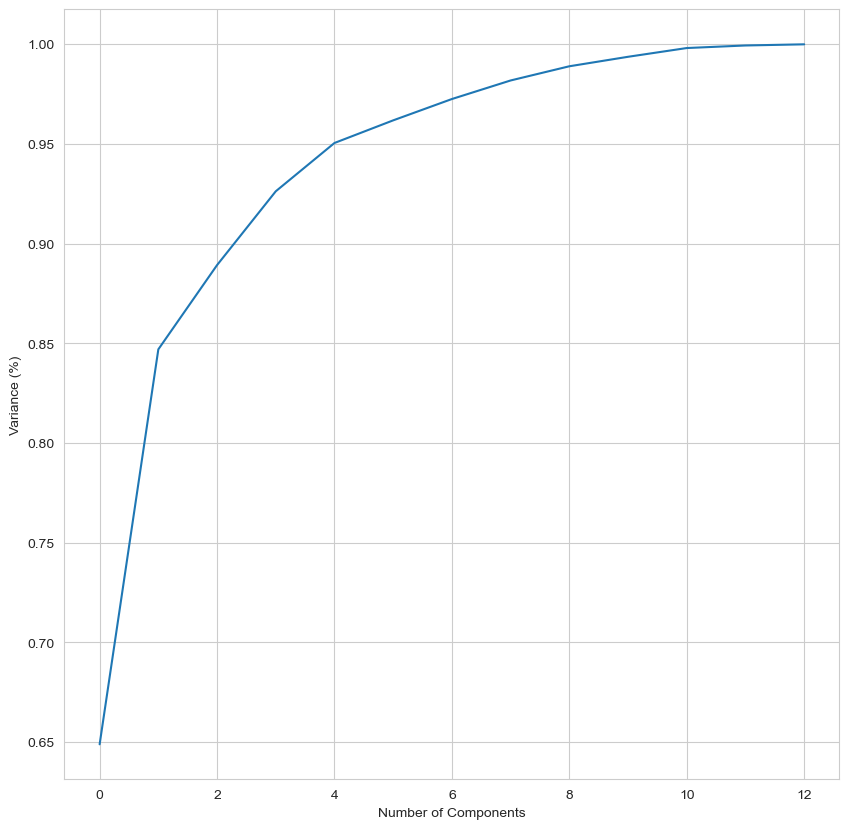

In [61]:
pca = PCA().fit(df)
plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.show()

# We can see that with 3 components we can explain more than 90% of the variance

In [62]:
K = 3
scaler = StandardScaler()
scaler.fit(df)
data_scaled = scaler.transform(df)

In [63]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=K, init='random', n_init=1)
kmeans_model.fit(data_scaled)
y = kmeans_model.labels_

pca = PCA(n_components=3)
pca_coordinates = pca.fit_transform(data_scaled)
pca_centroids = pca.transform(kmeans_model.cluster_centers_)

In [64]:
silhouette_avg = round(silhouette_score(data_scaled, y), 5)
sample_silhouette_values = silhouette_samples(data_scaled, y)

print(f'Overall Clustering Silhouette {silhouette_avg}')

Overall Clustering Silhouette 0.55269


overall clustering silhouette 0.5526930884863043


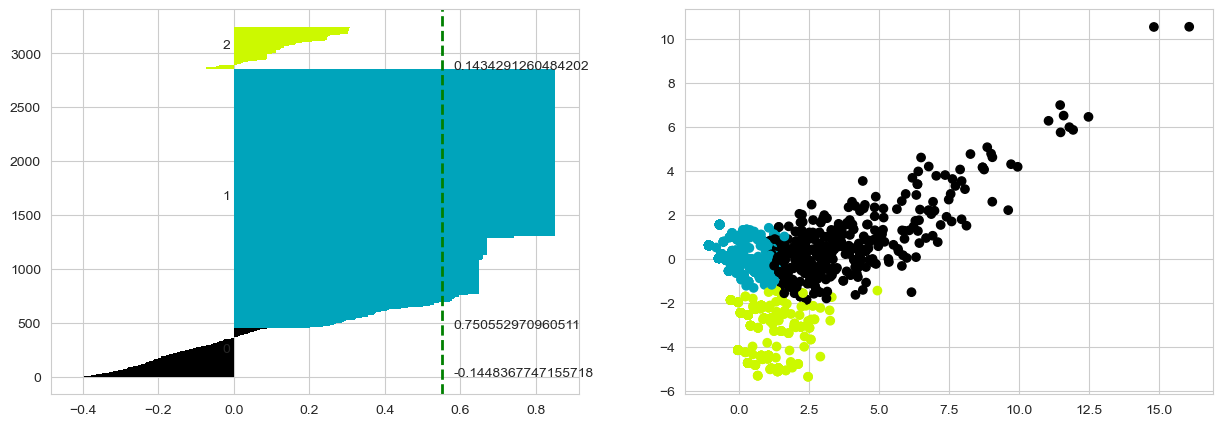

In [65]:
from matplotlib import cm

silhouette_avg = silhouette_score(data_scaled, y)
sample_silhouette_values = silhouette_samples(data_scaled, y)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0
y_upper = 0
for i,cluster in enumerate(np.unique(y)):
    cluster_silhouette_vals = sample_silhouette_values[y == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, edgecolor='none', color=cm.nipy_spectral(float(i) / K))
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(y.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)

## Predicting the values of Previous Activity using Decision Trees
## The data is very imbalanced because the number of 0s is much higher than the other values.

In [66]:
X = df.drop(columns=["Previous Activity"])
y = df["Previous Activity"]

(1948, 12)
Fitting 5 folds for each of 900 candidates, totalling 4500 fits
{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 3}
           ACC               BA                RECALL                  PRECISION
training 0.981006160164271,0.43704592015190125,0.981006160164271,0.9743574975750229
testing 0.9792147806004619,0.44261006289308175,0.9792147806004619,0.9720572245037339


C:\Users\santo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\santo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


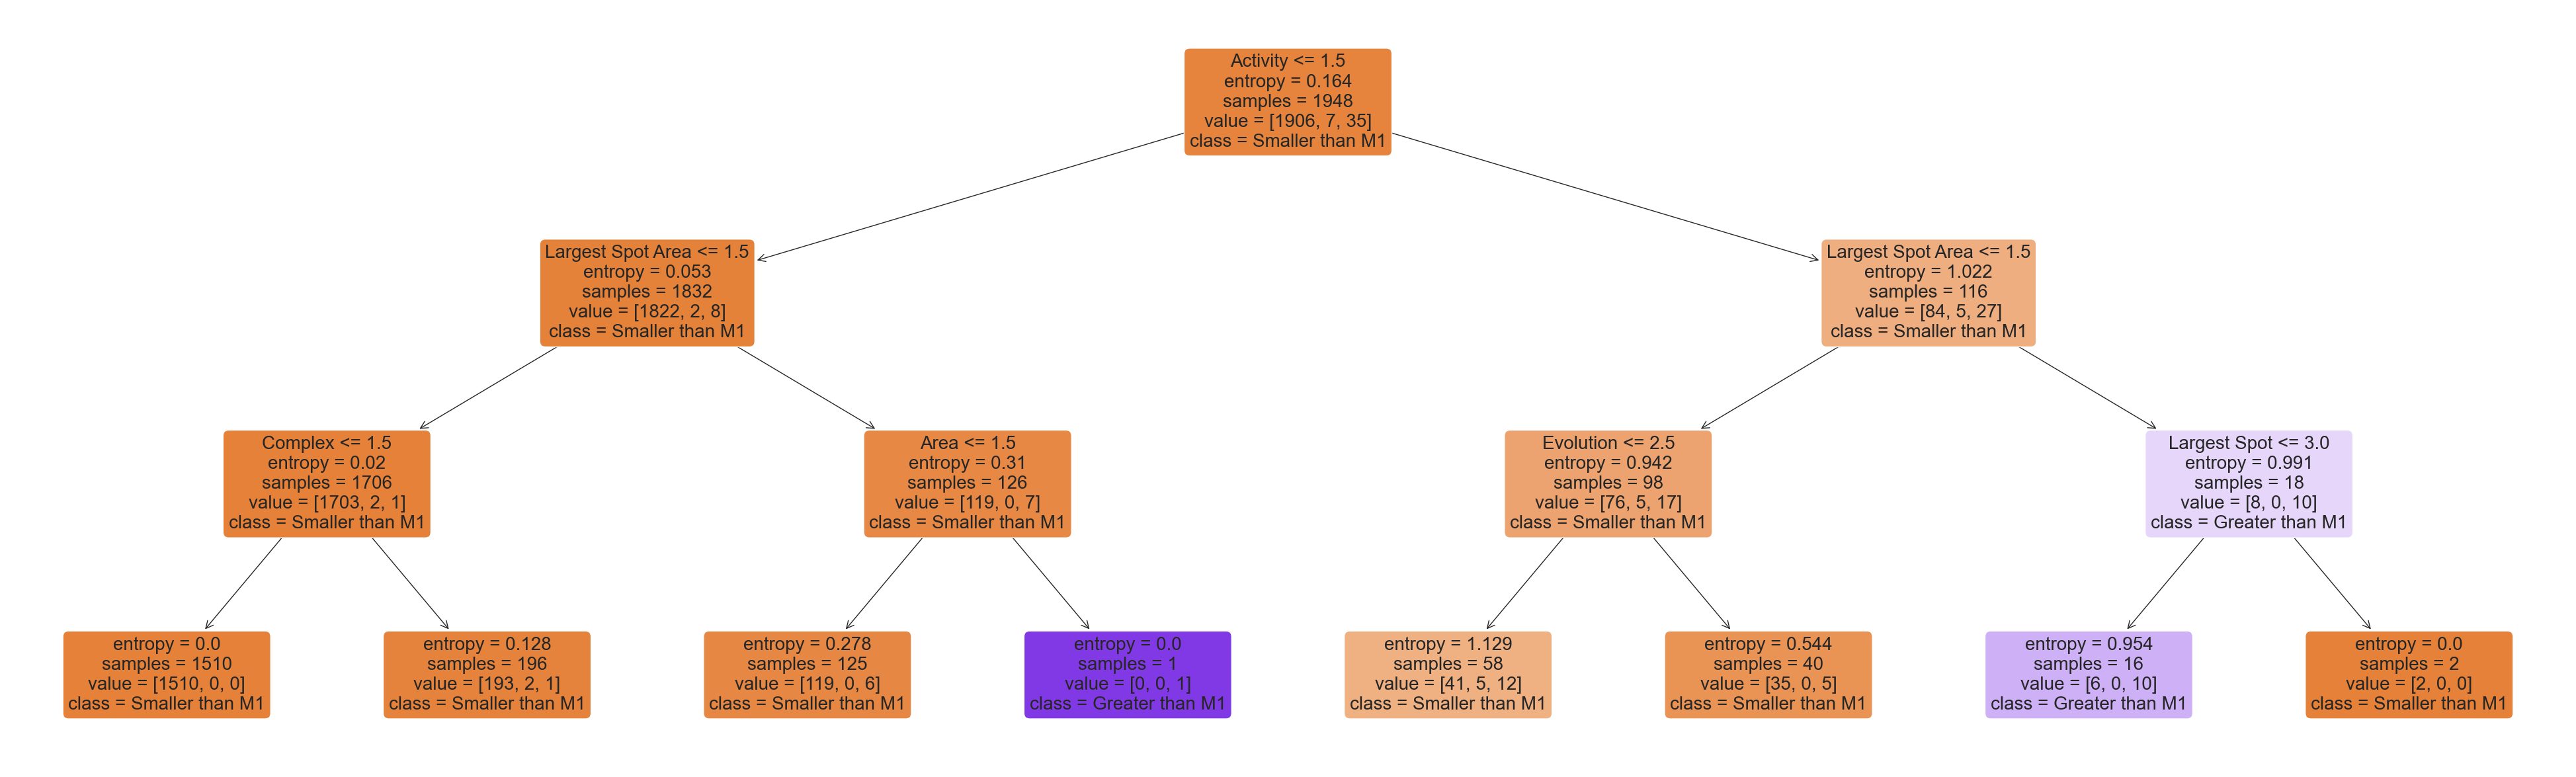

In [81]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=11)
print(X_train.shape)

decision_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 1]
}

tree_model = DecisionTreeClassifier()

tree_model = GridSearchCV(tree_model, decision_grid, cv=5, n_jobs=-1, verbose=1)
tree_model.fit(X_train, y_train)
print(tree_model.best_params_)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
training_ba = balanced_accuracy_score(y_train, y_predicted_train)
training_recall = recall_score(y_train, y_predicted_train, average='weighted')
training_precision = precision_score(y_train, y_predicted_train, average='weighted')
testing_acc = accuracy_score(y_test, y_predicted_test)
testing_ba = balanced_accuracy_score(y_test, y_predicted_test)
testing_recall = recall_score(y_test, y_predicted_test, average='weighted')
testing_precision = precision_score(y_test, y_predicted_test, average='weighted')
print('           ACC               BA                RECALL                  PRECISION')
print(f'training {training_acc},{training_ba},{training_recall},{training_precision}')
print(f'testing {testing_acc},{testing_ba},{testing_recall},{testing_precision}')

fig, ax = plt.subplots(figsize=(50, 15))
plot_tree(tree_model.best_estimator_,
            ax=ax,
            fontsize=20,
            feature_names=X.columns,
            class_names=["Smaller than M1", "Equal to M1", "Greater than M1"],
            filled=True,
            rounded=True)
plt.show()

In [82]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted_test)

array([[1265,    0,    7],
       [   6,    0,    0],
       [  14,    0,    7]], dtype=int64)

As we can see, the model is very good at predicting the previous activity when it is less than M1, but it is not very good at predicting when it is equal to M1 or greater than M1. So this model is not particularly useful and we need more data to train it.

## Predicting the previous activity using SVM

In [83]:
svm_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

svm_model = SVC()
svm_model = GridSearchCV(svm_model, svm_grid, cv=5, n_jobs=-1, verbose=1)
svm_model.fit(X_train, y_train)
print(svm_model.best_params_)
y_predicted_train = svm_model.predict(X_train)
y_predicted_test = svm_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
training_ba = balanced_accuracy_score(y_train, y_predicted_train)
training_recall = recall_score(y_train, y_predicted_train, average='weighted')
training_precision = precision_score(y_train, y_predicted_train, average='weighted')
testing_acc = accuracy_score(y_test, y_predicted_test)
testing_ba = balanced_accuracy_score(y_test, y_predicted_test)
testing_recall = recall_score(y_test, y_predicted_test, average='weighted')
testing_precision = precision_score(y_test, y_predicted_test, average='weighted')
print('           ACC               BA                RECALL                  PRECISION')
print(f'training {training_acc},{training_ba},{training_recall},{training_precision}')
print(f'testing {testing_acc},{testing_ba},{testing_recall},{testing_precision}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 0.1, 'gamma': 1}
           ACC               BA                RECALL                  PRECISION
training 0.9784394250513347,0.3333333333333333,0.9784394250513347,0.9573437084947864
testing 0.9792147806004619,0.3333333333333333,0.9792147806004619,0.9588615865464107


C:\Users\santo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\santo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
confusion_matrix(y_test, y_predicted_test)

array([[1272,    0,    0],
       [   6,    0,    0],
       [  21,    0,    0]], dtype=int64)

## Predicting the previous activity using Neural Networks

In [85]:
mlp_grid = { 'hidden_layer_sizes': [(10,10,10), (20,20,20), (30,30,30)],
             'alpha': [0.0001, 0.05],
             'learning_rate': ['constant','adaptive'],
             }
mlp_model = MLPClassifier()
mlp_model = GridSearchCV(mlp_model, mlp_grid, cv=5, n_jobs=-1, verbose=1)
mlp_model.fit(X_train, y_train)
y_predicted_train = mlp_model.predict(X_train)
y_predicted_test = mlp_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
training_ba = balanced_accuracy_score(y_train, y_predicted_train)
training_recall = recall_score(y_train, y_predicted_train, average='weighted')
training_precision = precision_score(y_train, y_predicted_train, average='weighted')
testing_acc = accuracy_score(y_test, y_predicted_test)
testing_ba = balanced_accuracy_score(y_test, y_predicted_test)
testing_recall = recall_score(y_test, y_predicted_test, average='weighted')
testing_precision = precision_score(y_test, y_predicted_test, average='weighted')
print('           ACC               BA                RECALL                  PRECISION')
print(f'training {training_acc},{training_ba},{training_recall},{training_precision}')
print(f'testing {testing_acc},{testing_ba},{testing_recall},{testing_precision}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
           ACC               BA                RECALL                  PRECISION
training 0.9820328542094456,0.4560935391995203,0.9820328542094456,0.9758479506147856
testing 0.9799846035411856,0.44287211740041926,0.9799846035411856,0.9726908558130566


C:\Users\santo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\santo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\santo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
confusion_matrix(y_test, y_predicted_test)

array([[1266,    0,    6],
       [   6,    0,    0],
       [  14,    0,    7]], dtype=int64)

## Every model has the same problem due to the lack of data. And the balanced accuracy is very low.

## Now we try to predict the C-Class using regression models

In [ ]:
X = df.drop(columns=["C-Class", "M-Class", "X-Class"])
y = df["C-Class"]

np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=11)
print(X_train.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)
y_predicted_train = linear_model.predict(X_train)
y_predicted_test = linear_model.predict(X_test)
training_mse = mean_squared_error(y_train, y_predicted_train)
testing_mse = mean_squared_error(y_test, y_predicted_test)
print(f'training mse {training_mse}\ntesting mse {testing_mse}')

training_r2 = r2_score(y_train, y_predicted_train)
testing_r2 = r2_score(y_test, y_predicted_test)
print(f'training r2 {training_r2}\ntesting r2 {testing_r2}')

## We can see that the r2 score is very low. So we try to use a different model to see if we can get better results.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_grid = {
    'degree': [1, 2, 3, 4, 5, 6, 7, 8]
}
poly = PolynomialFeatures()

for degree in poly_grid['degree']:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    linear_model = LinearRegression(fit_intercept=True)
    linear_model.fit(X_train_poly, y_train)
    y_predicted_train = linear_model.predict(X_train_poly)
    y_predicted_test = linear_model.predict(X_test_poly)
    training_mse = mean_squared_error(y_train, y_predicted_train)
    testing_mse = mean_squared_error(y_test, y_predicted_test)
    print(f'degree {degree} of polynomial features')
    print(f'training mse {training_mse}\ntesting mse {testing_mse}')

    training_r2 = r2_score(y_train, y_predicted_train)
    testing_r2 = r2_score(y_test, y_predicted_test)
    print(f'training r2 {training_r2}\ntesting r2 {testing_r2}')